In [1]:
from google.colab import drive

In [5]:
drive.mount('./content/drive')

ValueError: ignored

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# read the data
df = pd.read_csv('/content/shrink_ray_dataset.csv')

# getting the shape
df.shape

(200, 2)

In [11]:
df

,Power,Shrinkage
0,0.00,0.00
1,1.51,0.00
2,3.02,0.00
3,4.52,2.67
4,6.03,0.00
...,...,...
195,293.97,89.62
196,295.48,94.92
197,296.98,88.65
198,298.49,90.79


In [13]:
df.head()

,Power,Shrinkage
0,0.00,0.00
1,1.51,0.00
2,3.02,0.00
3,4.52,2.67
4,6.03,0.00


In [14]:
df.describe()

,Power,Shrinkage
count,200.000000,200.000000
mean,150.000000,45.274700
std,87.254773,28.252884
min,0.000000,0.000000
25%,75.002500,20.435000
50%,150.000000,43.855000
75%,224.997500,70.595000
max,300.000000,94.920000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Power      200 non-null    float64
 1   Shrinkage  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


Text(0.5, 1.0, 'Distribution of power')

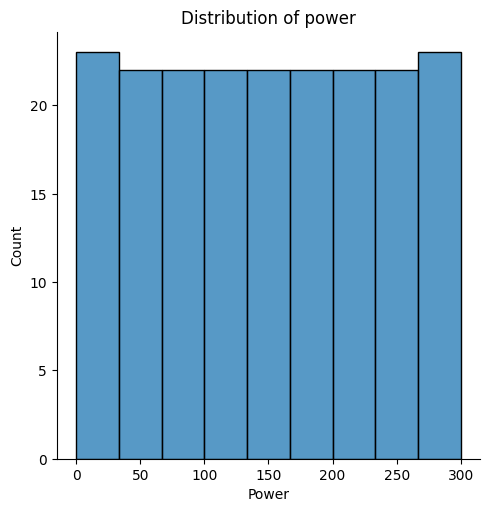

In [17]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.displot(df['Power'])
plt.title('Distribution of power')

Text(0.5, 1.0, 'Distribution of Shrinkage')

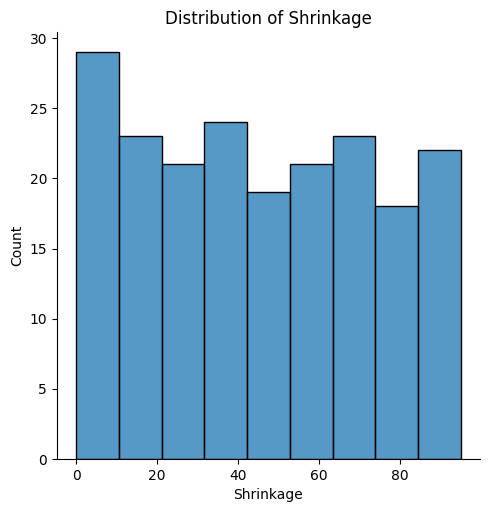

In [18]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.displot(df['Shrinkage'])
plt.title('Distribution of Shrinkage')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [52]:
# Extract input (X) and target (y) values
X = df[['Shrinkage']].values
y = df['Power'].values

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(160, 1)
(40, 1)
(160,)
(40,)


In [55]:
# Create a Linear Regression model
model = LinearRegression()

In [56]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

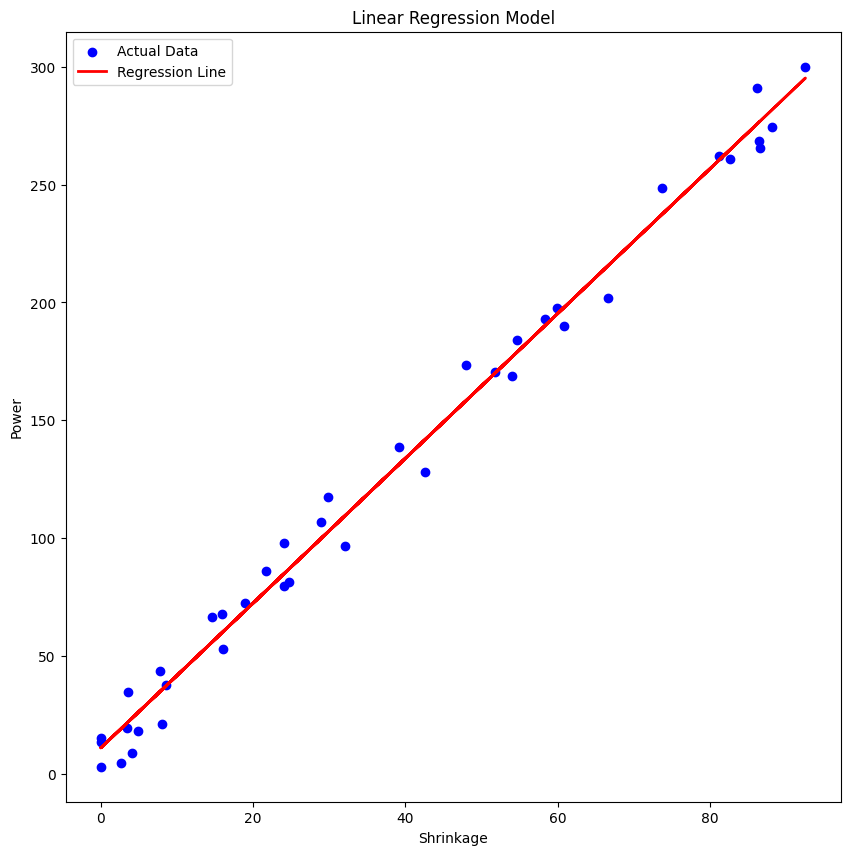

In [58]:
# Visualize the model's performance
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Shrinkage')
plt.ylabel('Power')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

In [59]:
# Predict knob setting for 85% shrinkage
target_shrinkage = 85.0
predicted_knob = model.predict([[target_shrinkage]])
print(f"Predicted knob setting for {target_shrinkage}% shrinkage: {predicted_knob[0]} MW")

Predicted knob setting for 85.0% shrinkage: 271.99495824113063 MW
